# Homework 11
# By Yukun Wan (yw3447)

# Time series clustering exercise

## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
    3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
    4. Use another clustering algorithm (of your choice)
    5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
    6. Compare the results of the 2 algorithms
    7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 
    

In [224]:
import pandas as pd
import zipfile 
import os
import urllib.request as urllib
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

# Data Cleaning

## 1. Download the census bureau business data for all years 1993-2014. 
You can investigate using the API (I have not done it with the census bureau). I did is as you see below

In [4]:
#these commands can be run on the shell and get the data with the command wget
#the cell needs to be run only once
!for ((y=93; y<=99; y+=1)); do wget \
https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp$y\totals.zip; mv zbp$y\totals.zip $PUIDATA; done

!for ((y=0; y<=1; y+=1)); do wget \
https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp0$y\totals.zip; mv zbp0$y\totals.zip $PUIDATA; done

!for ((y=2; y<=9; y+=1)); do wget \
https://www2.census.gov/econ200$y\/CBP_CSV//zbp0$y\totals.zip; mv zbp0$y\totals.zip $PUIDATA; done

!for ((y=10; y<=14; y+=1)); do wget \
https://www2.census.gov/econ20$y\/CBP_CSV//zbp$y\totals.zip; mv zbp$y\totals.zip $PUIDATA; done



--2017-12-12 00:29:36--  https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp93totals.zip
Resolving www2.census.gov... 104.99.148.110, 2600:1408:1d:386::208c, 2600:1408:1d:38b::208c
Connecting to www2.census.gov|104.99.148.110|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2017-12-12 00:29:37 ERROR 404: Not Found.

mv: rename zbp93totals.zip to /Users/wanyukun/PUIdata/zbp93totals.zip: No such file or directory
--2017-12-12 00:29:37--  https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV//zbp94totals.zip
Resolving www2.census.gov... 104.99.148.110, 2600:1408:1d:386::208c, 2600:1408:1d:38b::208c
Connecting to www2.census.gov|104.99.148.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611524 (597K) [application/zip]
Saving to: 'zbp94totals.zip'

zbp94totals.zip     100%[===================>] 597.19K  --.-KB/s    in 0.09s   

2017-12-12 00:29:37 (6.15 MB/s) - 'zbp94totals.zip' saved [611524/611524]

--2017-12-12 00:29:37--  https:

Connecting to www2.census.gov|104.99.148.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 660109 (645K) [application/zip]
Saving to: 'zbp09totals.zip'

zbp09totals.zip     100%[===================>] 644.64K  --.-KB/s    in 0.1s    

2017-12-12 00:29:40 (6.05 MB/s) - 'zbp09totals.zip' saved [660109/660109]

--2017-12-12 00:29:40--  https://www2.census.gov/econ2010/CBP_CSV//zbp10totals.zip
Resolving www2.census.gov... 104.99.148.110, 2600:1408:1d:386::208c, 2600:1408:1d:38b::208c
Connecting to www2.census.gov|104.99.148.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 797534 (779K) [application/zip]
Saving to: 'zbp10totals.zip'

zbp10totals.zip     100%[===================>] 778.84K  --.-KB/s    in 0.1s    

2017-12-12 00:29:40 (5.55 MB/s) - 'zbp10totals.zip' saved [797534/797534]

--2017-12-12 00:29:40--  https://www2.census.gov/econ2011/CBP_CSV//zbp11totals.zip
Resolving www2.census.gov... 104.99.148.110, 2600:1408:1d:386::208c,

 ## 2. Download the NYC zipcodes shapefile. 
 
 
 One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


In [52]:
url = "https://data.cityofnewyork.us/download/i8iw-xf4u/application/zip"
urllib.urlretrieve(url,'nyczip.zip')
os.system('mv nyczip.zip $PUIDATA')
os.system('unzip -o $PUIDATA/nyczip.zip -d $PUIDATA/nyczip')

0

## 3. Read NYC zipcode shapefile

In [54]:
NYCzip = gpd.read_file(os.getenv('PUIDATA') + '/nyczip/ZIP_CODE_040114.shp')

In [55]:
NYCzip.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.251871482 188138.3800067157,...  
1  POLYGON ((1001613.712964058 186926.4395172149,...  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  
3  POLYGON ((995908.3654508889 183617.6128015518,...  
4  POLYGON ((991997.1134308875 176307.4958601296,...

In [66]:
ziplist

array(['11436', '11213', '11212', '11225', '11218', '11226', '11219',
       '11210', '11230', '11204', '10471', '10470', '10466', '10467',
       '10463', '10475', '10464', '10469', '10468', '10458', '10034',
       '10033', '10462', '10040', '10453', '10465', '10461', '10457',
       '10460', '10032', '10452', '10456', '10472', '10031', '10039',
       '10459', '10451', '10473', '10030', '10027', '10474', '10455',
       '10037', '10024', '10454', '10026', '10035', '10048', '10025',
       '11357', '10029', '00083', '11356', '11359', '11360', '11105',
       '10128', '10023', '11363', '10028', '11354', '11102', '11370',
       '10021', '11358', '11362', '10044', '11369', '11103', '11106',
       '11368', '11377', '11355', '11101', '11364', '10018', '10020',
       '11005', '10017', '10001', '10011', '10016', '11104', '11109',
       '10010', '11367', '10014', '10003', '11222', '10002', '11378',
       '10009', '10012', '10013', '10007', '11237', '11385', '10038',
       '11206', '100

In [67]:
ziplist = NYCzip.ZIPCODE.unique().astype(int)

In [69]:
len(ziplist)

248

## 4. Read census bureau business data

In [247]:
zipest = pd.DataFrame(ziplist)
zipest.columns = ['ZIP']

In [248]:
YEARS = map(str,range(1994, 2015, 1))
YEARS = map(lambda x:x[2:4],YEARS)

In [249]:
for y in YEARS:
    fname = os.getenv("PUIDATA") + '/zbp' + y + 'totals.zip'
    df = pd.read_csv(fname)
    df.columns = map(str.upper, df.columns)
    temp = df[np.in1d(df.ZIP, ziplist)].loc[:,['ZIP','EST']]
    temp.columns = ['ZIP','EST' + y ]
    zipest = zipest.merge(temp,on='ZIP',how='left')

In [250]:
zipest.set_index('ZIP',inplace=True)
zipest.head()

EST94   EST95   EST96   EST97   EST98   EST99   EST00   EST01   EST02  \
ZIP                                                                            
11436   51.0    50.0    53.0    51.0    51.0    58.0    65.0    57.0    78.0   
11213  406.0   420.0   433.0   456.0   476.0   473.0   477.0   493.0   546.0   
11212  505.0   494.0   502.0   527.0   519.0   541.0   520.0   527.0   577.0   
11225  381.0   387.0   388.0   410.0   416.0   409.0   417.0   422.0   479.0   
11218  985.0  1015.0  1049.0  1075.0  1118.0  1149.0  1161.0  1180.0  1228.0   

        EST03   ...     EST05   EST06   EST07   EST08   EST09   EST10   EST11  \
ZIP             ...                                                             
11436    74.0   ...      82.0    80.0    84.0    90.0    92.0    98.0   101.0   
11213   569.0   ...     556.0   565.0   556.0   592.0   621.0   675.0   674.0   
11212   581.0   ...     587.0   570.0   587.0   602.0   647.0   699.0   713.0   
11225   488.0   ...     491.0   499.0   514.0   520.0   543.0   580.0   597.0   
11218  1247.0   ...    1332.0  1331.0  1377.0  1397.0  1457.0  1474.0  1523.0   

        EST12   EST13   EST14  
ZIP                            
11436    95.0    99.0   109.0  
11213   726.0   755.0   772.0  
11212   721.0   731.0   752.0  
11225   623.0   673.0   696.0  
11218  1605.0  1687.0  1736.0  

[5 rows x 21 columns]

In [251]:
zipest.shape

(248, 21)

In [252]:
# Remove zipcode with all NaN
zipest.dropna(how='all',axis=0,inplace=True)

In [253]:
zipest_mean = zipest.iloc[:,:].mean(axis=1)
zipest_std = zipest.iloc[:,:].std(axis=1)
zipest.iloc[:,:] = zipest.iloc[:,:].apply(lambda x: (x- zipest_mean) / zipest_std)

In [254]:
zipest.fillna(0,inplace=True)

# K-means clustering

In [257]:
n = [3,5,7]
for i in n:
    KM = KMeans(n_clusters=i,random_state=2017)
    res = KM.fit(zipest)
    zipest['labelKM' + str(i)] = res.labels_

In [260]:
zipest.head()

EST94     EST95     EST96     EST97     EST98     EST99     EST00  \
ZIP                                                                           
11436 -1.296083 -1.347340 -1.193568 -1.296083 -1.296083 -0.937280 -0.578478   
11213 -1.433782 -1.305462 -1.186307 -0.975496 -0.792181 -0.819678 -0.783015   
11212 -1.077974 -1.210216 -1.114040 -0.813490 -0.909666 -0.645182 -0.897644   
11225 -1.223282 -1.159696 -1.149098 -0.915948 -0.852361 -0.926545 -0.841764   
11218 -1.474935 -1.336988 -1.180649 -1.061095 -0.863371 -0.720826 -0.665648   

          EST01     EST02     EST03    ...        EST08     EST09     EST10  \
ZIP                                    ...                                    
11436 -0.988538  0.087870 -0.117160    ...     0.702960  0.805475  1.113020   
11213 -0.636364 -0.150580  0.060232    ...     0.271044  0.536850  1.031799   
11212 -0.813490 -0.212389 -0.164301    ...     0.088161  0.629152  1.254297   
11225 -0.788775 -0.184704 -0.089324    ...     0.249804  0.493552  0.885668   
11218 -0.578281 -0.357567 -0.270200    ...     0.419533  0.695427  0.773596   

          EST11     EST12     EST13     EST14  labelKM3  labelKM5  labelKM7  
ZIP                                                                          
11436  1.266793  0.959248  1.164278  1.676853         2         0         1  
11213  1.022634  1.499252  1.765058  1.920875         2         0         1  
11212  1.422605  1.518781  1.639001  1.891464         2         0         1  
11225  1.065830  1.341371  1.871258  2.115007         2         0         1  
11218  0.998909  1.375964  1.753018  1.978331         2         0         1  

[5 rows x 24 columns]

In [258]:
zipest.shape

(245, 24)

## define function to plot cluster center

In [285]:

x = range(21)
def plotcenter(fig,num,t):
    '''
    num: number of clusters
    t: KM or H
    '''
    for i in range(num):
        ax = fig.add_subplot(num/2 + 1,2,i+1)
        sub = zipest[zipest['label' + str(t) + str(num)]==i].iloc[:,range(21)]
        mean = sub.mean(axis=0)
        #print(mean)
        for j in range(len(sub)):
            ax.plot(x,sub.iloc[j,range(21)],'steelblue',alpha=0.7)
        ax.plot(x,mean,'indianred',linewidth=5)
        ax.set_title('Cluster {}'.format(i))
        ax.set_xlabel('Year')
        #pl.xticks(arange(21),ziplist,rotation=60)
    #pl.suptitle('K-means cluster',size=16)
    #plt.subplots_adjust(left=0.2, top=0.2)
    #pl.tight_layout()
    pl.show()

# Plot K-means cluster center

#### Number of K-means clusters = 3

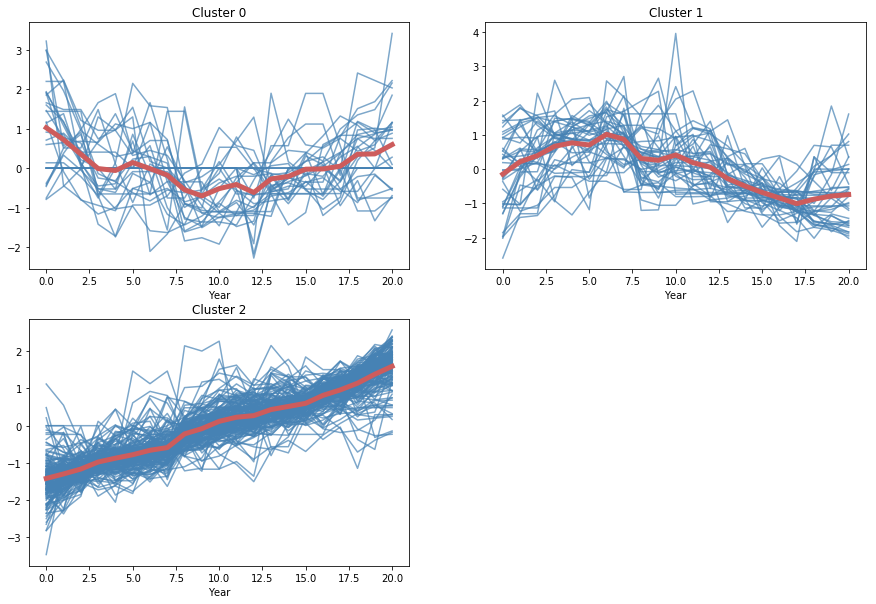

In [286]:
fig = pl.figure(figsize(15,10))
plotcenter(fig,3,'KM')

#### Number of K-means clusters = 5

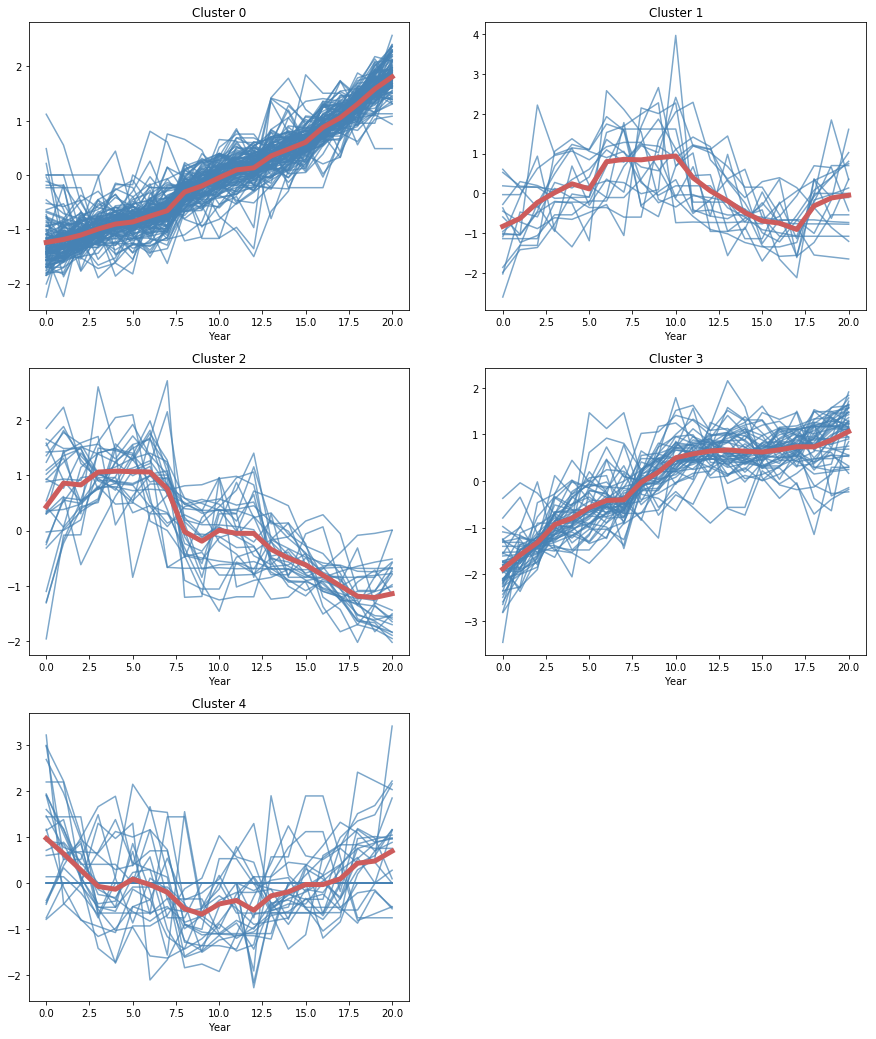

In [287]:
fig = pl.figure(figsize(15,18))
plotcenter(fig,5,'KM')

#### Number of K-means clusters = 7

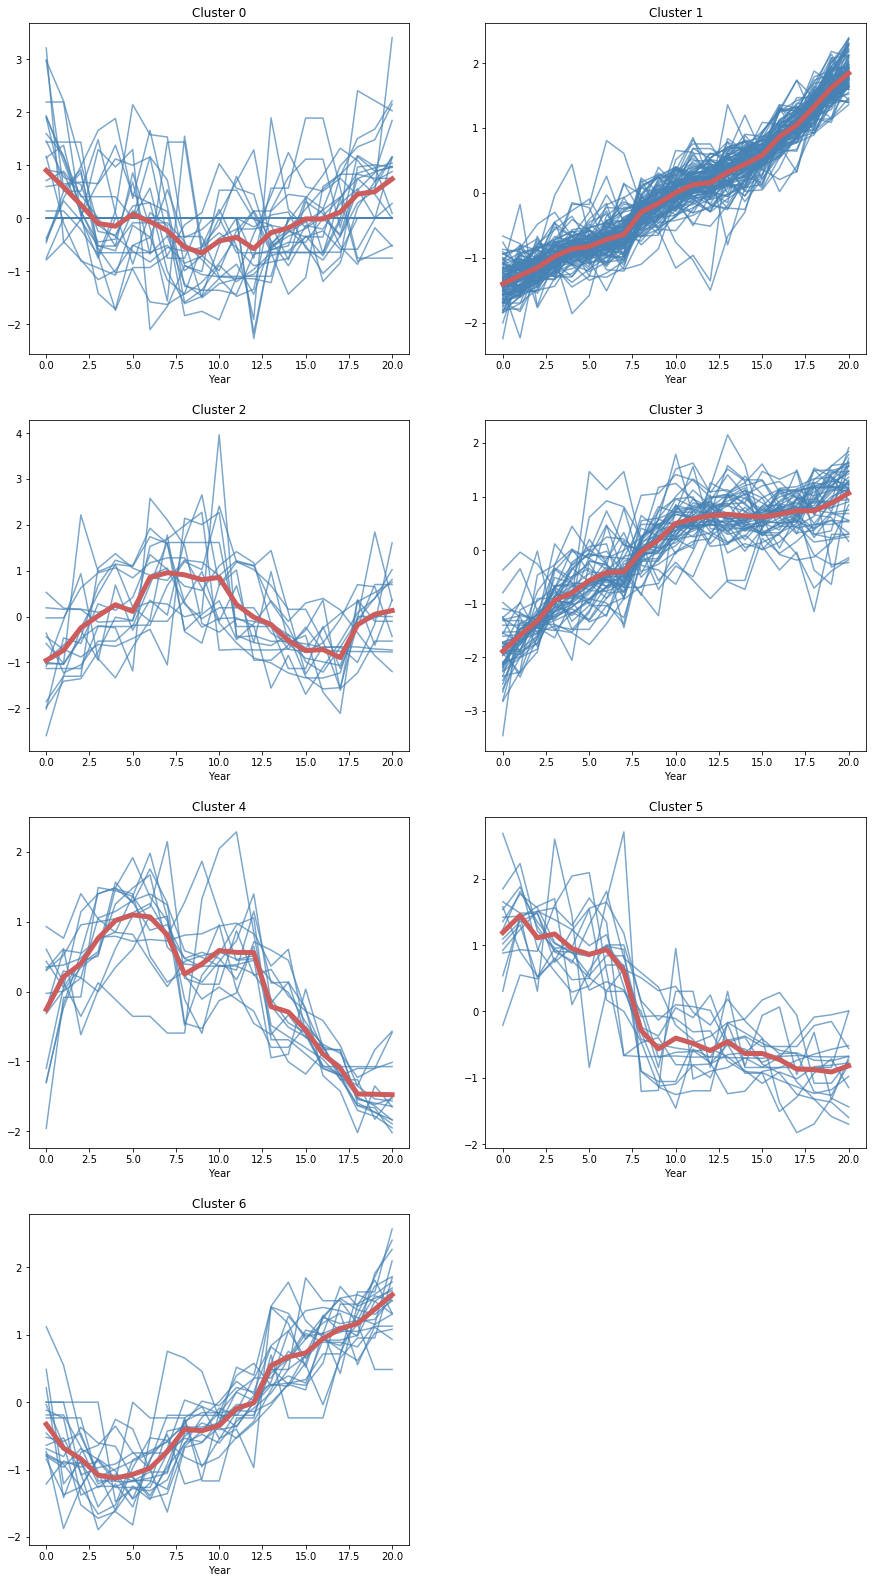

In [288]:
fig = pl.figure(figsize(15,28))
plotcenter(fig,7,'KM')

# Hierarchical clustering

### Distance dendrogram

In [ ]:
fig = pl.figure(figsize=(10,10))

ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(wc, method='ward'),
                               labels = df.city.values,
                               leaf_rotation=90.,# rotates the x axis labels
                               leaf_font_size=20, truncate_mode='lastp', p=12, 
                               show_contracted=True, color_threshold = 2, 
                               orientation='right', above_threshold_color='k'
                              )  # font size for the x axis labels)
#pl.xticks(rotation=90)
pl.xlabel("distance", fontsize=20)
pl.yticks(fontsize=15, rotation=0)
pl.grid('off')
#scp.hierarchy.dendrogram?

In [289]:
n = [3,5,7]
for i in n:
    agc = AgglomerativeClustering(n_clusters = i, compute_full_tree = True).fit(zipest)
    zipest['labelH' + str(i)] = agc.labels_

In [290]:
zipest.head()

EST94     EST95     EST96     EST97     EST98     EST99     EST00  \
ZIP                                                                           
11436 -1.296083 -1.347340 -1.193568 -1.296083 -1.296083 -0.937280 -0.578478   
11213 -1.433782 -1.305462 -1.186307 -0.975496 -0.792181 -0.819678 -0.783015   
11212 -1.077974 -1.210216 -1.114040 -0.813490 -0.909666 -0.645182 -0.897644   
11225 -1.223282 -1.159696 -1.149098 -0.915948 -0.852361 -0.926545 -0.841764   
11218 -1.474935 -1.336988 -1.180649 -1.061095 -0.863371 -0.720826 -0.665648   

          EST01     EST02     EST03   ...        EST11     EST12     EST13  \
ZIP                                   ...                                    
11436 -0.988538  0.087870 -0.117160   ...     1.266793  0.959248  1.164278   
11213 -0.636364 -0.150580  0.060232   ...     1.022634  1.499252  1.765058   
11212 -0.813490 -0.212389 -0.164301   ...     1.422605  1.518781  1.639001   
11225 -0.788775 -0.184704 -0.089324   ...     1.065830  1.341371  1.871258   
11218 -0.578281 -0.357567 -0.270200   ...     0.998909  1.375964  1.753018   

          EST14  labelKM3  labelKM5  labelKM7  labelH3  labelH5  labelH7  
ZIP                                                                       
11436  1.676853         2         0         1        2        2        5  
11213  1.920875         2         0         1        2        2        5  
11212  1.891464         2         0         1        2        2        5  
11225  2.115007         2         0         1        2        2        5  
11218  1.978331         2         0         1        2        2        5  

[5 rows x 27 columns]

# Plot hierarchical cluster center

#### Number of hierarchical clusters = 3

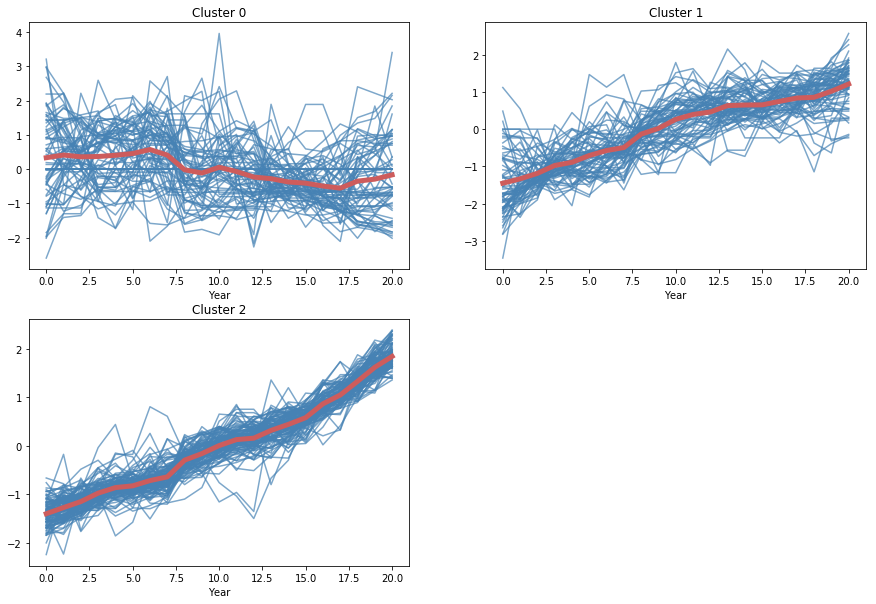

In [291]:
fig = pl.figure(figsize(15,10))
plotcenter(fig,3,'H')

#### Number of hierarchical clusters = 5

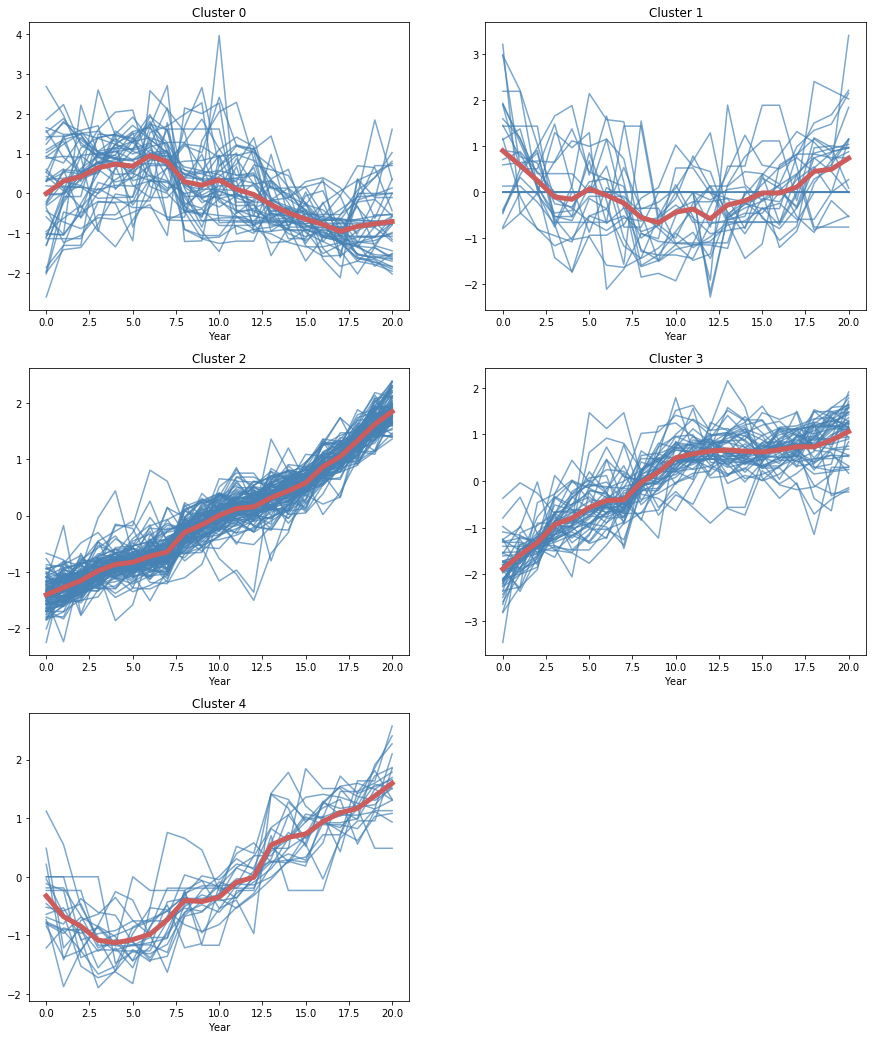

In [293]:
fig = pl.figure(figsize(15,18))
plotcenter(fig,5,'H')

#### Number of hierarchical clusters = 7

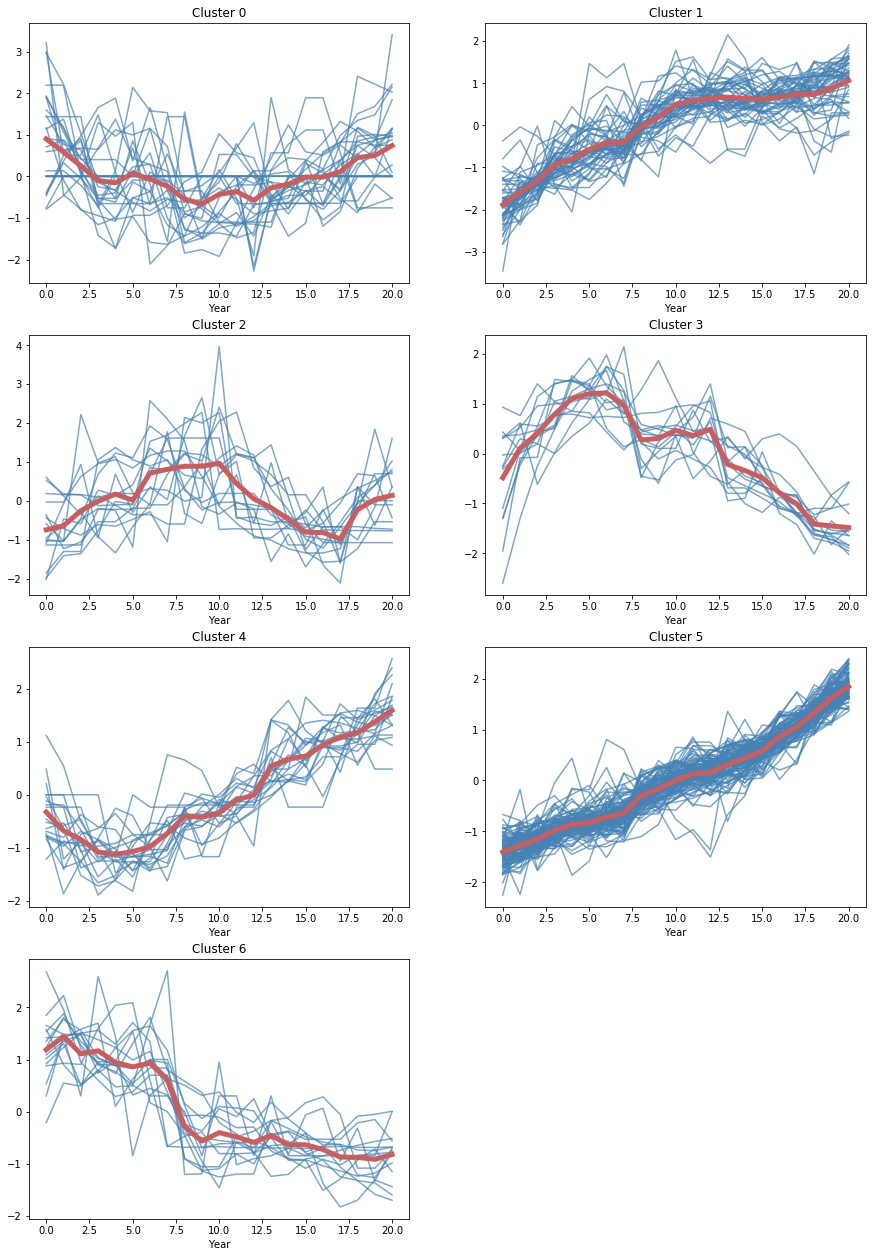

In [295]:
fig = pl.figure(figsize(15,22))
plotcenter(fig,7,'H')

# Overlay data on a NYC map

In [219]:
NYCzip.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0    11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1    11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2    11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3    11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4    11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.251871482 188138.3800067157,...  
1  POLYGON ((1001613.712964058 186926.4395172149,...  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  
3  POLYGON ((995908.3654508889 183617.6128015518,...  
4  POLYGON ((991997.1134308875 176307.4958601296,...

In [202]:
len(NYCzip),len(zipest)

(263, 245)

In [220]:
NYCzip.ZIPCODE = NYCzip.ZIPCODE.astype(int)

In [296]:
NYCzipKM = NYCzip.merge(zipest[['labelKM5']],left_on='ZIPCODE',right_index=True)

In [297]:
NYCzipH = NYCzip.merge(zipest[['labelH5']],left_on='ZIPCODE',right_index=True)

## 1. NYC map in K means clustering

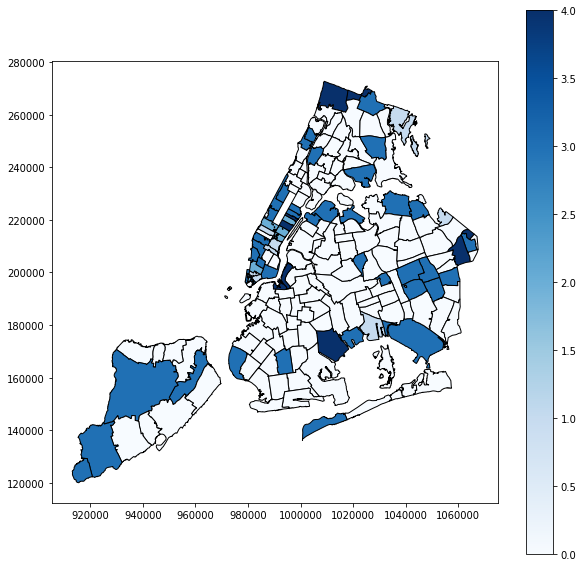

In [298]:
NYCzipKM.plot(figsize=(10,10),column='labelKM5',cmap='Blues',edgecolor='black',legend=True)

## 2. NYC map in  hierarchical clustering

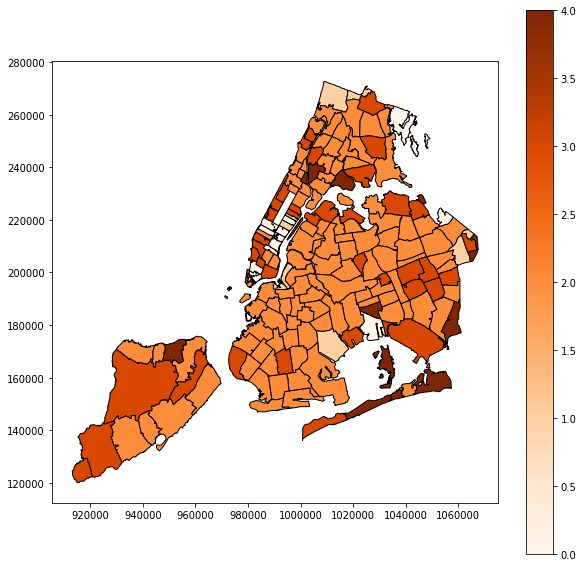

In [299]:
NYCzipH.plot(figsize=(10,10),column='labelH5',cmap='Oranges',edgecolor='black',legend=True)

# Compare the results of the 2 algorithms


# Attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 

### The map of the clusters may look something like this

//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


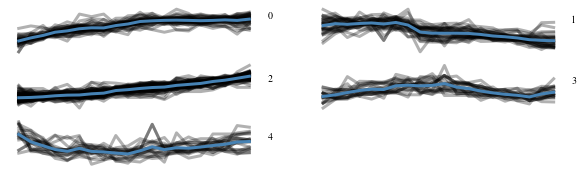

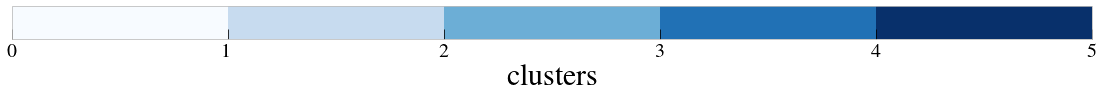

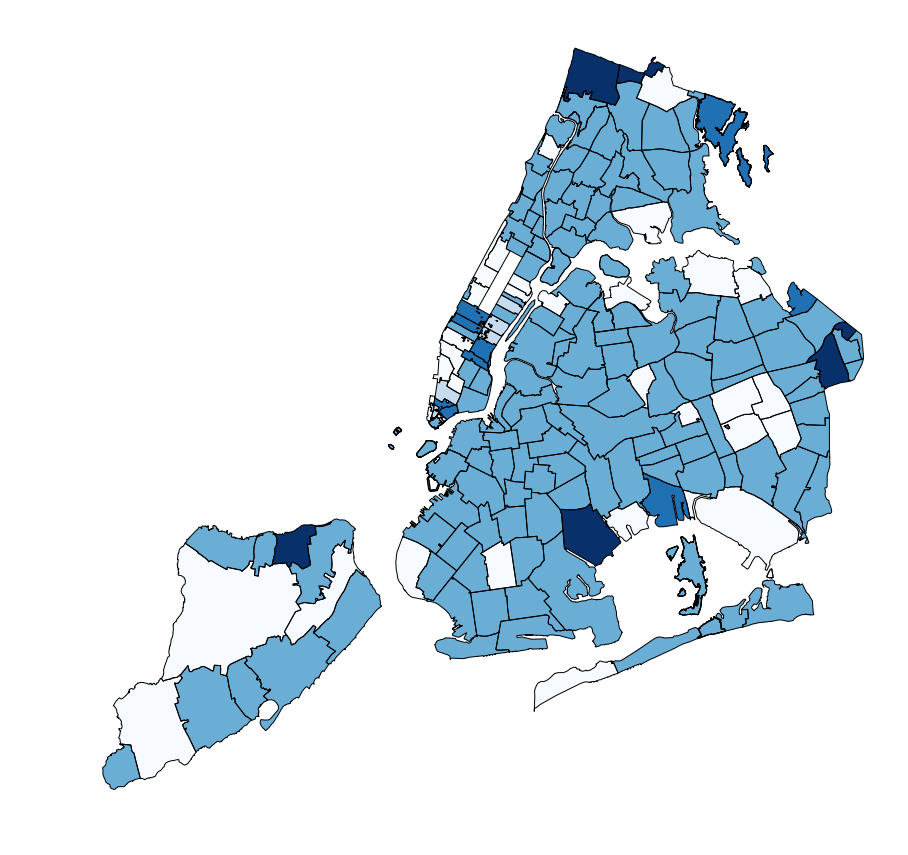

In [16]:
...

### Figure 3: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

(905410.75604293647,
 1075212.5382562787,
 112386.35181947277,
 280345.45402395504)

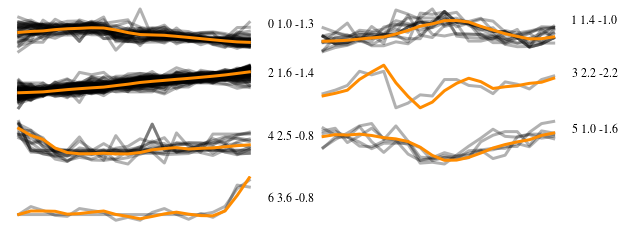

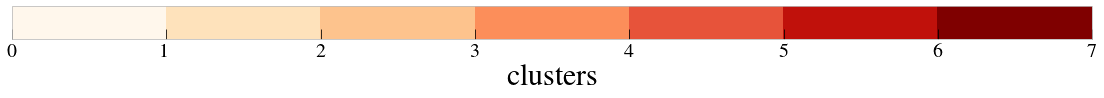

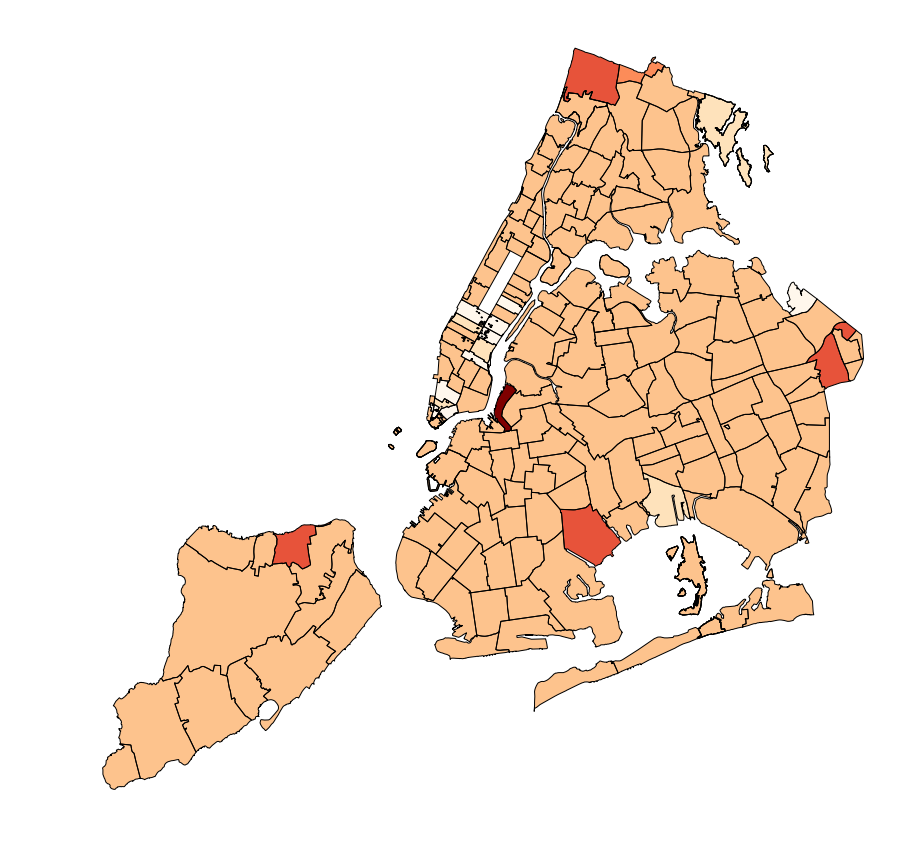

In [29]:
...

### Figure 9: 
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

### And if you use hierarchical clustering and make a dandrogram it may look like this:

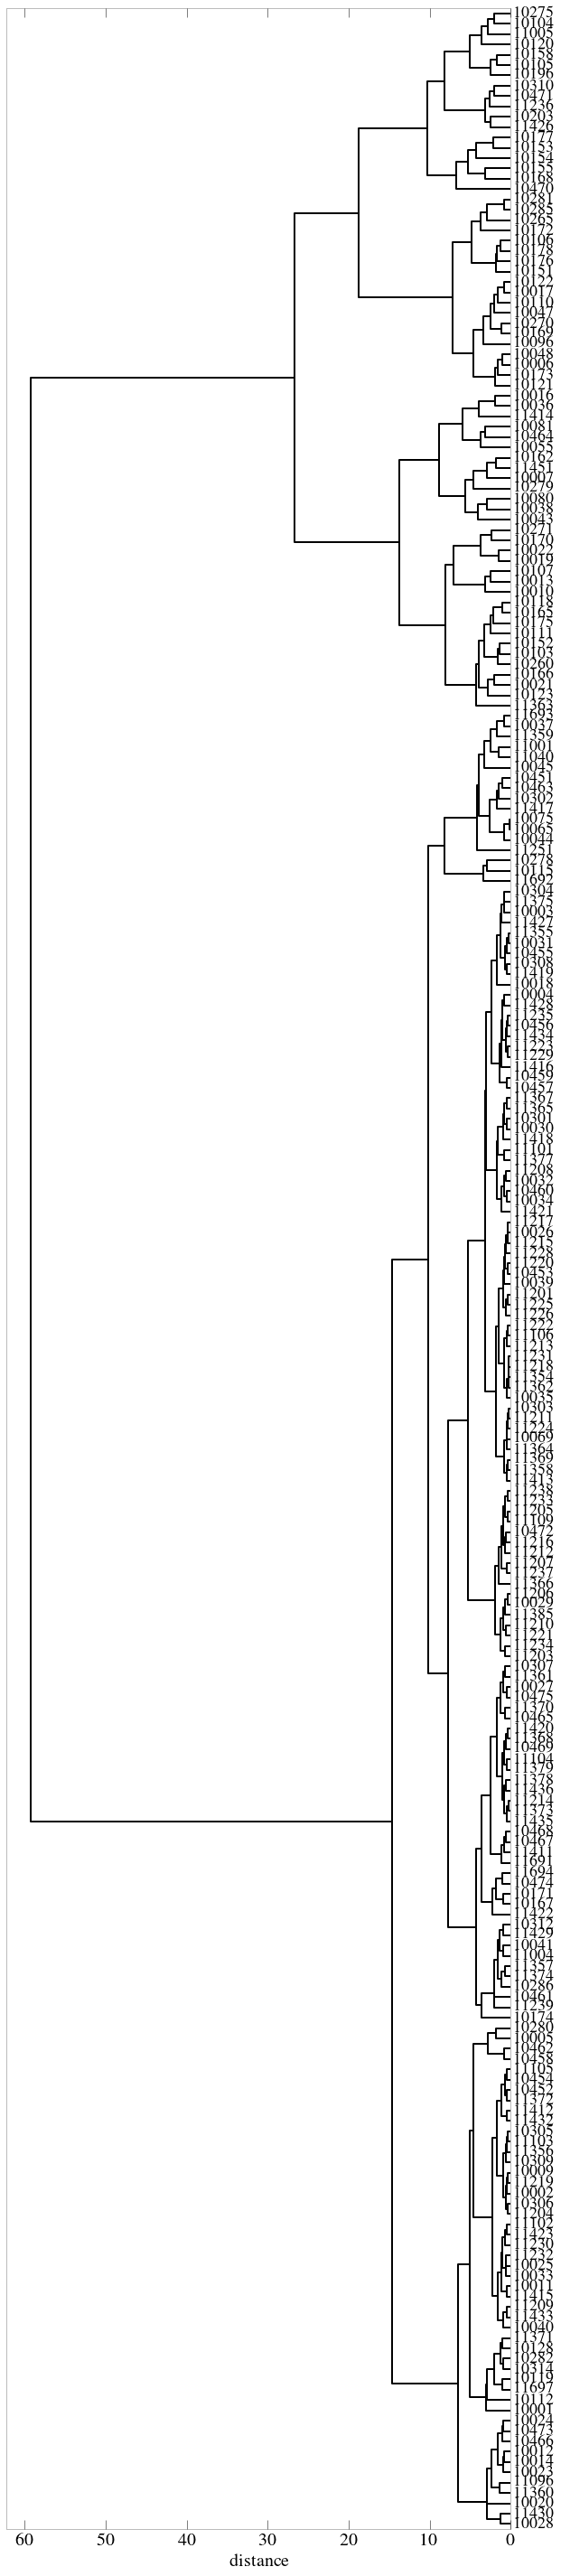

In [1]:
from PIL import Image
Image.open("dandrogram.png")